# Apply observables

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import time
import datetime

from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

In [2]:
circ1 = Circuit().h(0).h(1)
circ1.expectation(Observable.X() @ Observable.X(), target=[0,1])
circ1.expectation(Observable.X(), target=[0])
circ1.expectation(Observable.X(), target=[1])
print(circ1)

circ2 = Circuit().h(0).h(1)
circ2.expectation(Observable.Y() @ Observable.Y(), target=[0,1])
circ2.expectation(Observable.Y(), target=[0])
circ2.expectation(Observable.Y(), target=[1])
# print(circ2)

circ3 = Circuit().h(0).h(1)
circ3.expectation(Observable.Z() @ Observable.Z(), target=[0,1])
circ3.expectation(Observable.Z(), target=[0])
circ3.expectation(Observable.Z(), target=[1])
# print(circ3)

circ4 = Circuit().h(0).h(1)
circ4.expectation(Observable.H() @ Observable.H(), target=[0,1])
circ4.expectation(Observable.H(), target=[0])
circ4.expectation(Observable.H(), target=[1])
# print(circ4)

circ5 = Circuit().h(0).h(1)
circ5.expectation(Observable.I() @ Observable.I(), target=[0,1])
circ5.expectation(Observable.I(), target=[0])
circ5.expectation(Observable.I(), target=[1])
# print(circ5)

T  : |0|         Result Types          |
                                        
q0 : -H-Expectation(X@X)-Expectation(X)-
        |                               
q1 : -H-Expectation(X@X)-Expectation(X)-

T  : |0|         Result Types          |


Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(1)]))], 'result_types': [Expectation(observable=TensorProduct(I('qubit_count': 1), I('qubit_count': 1)), target=QubitSet([Qubit(0), Qubit(1)])), Expectation(observable=I('qubit_count': 1), target=QubitSet([Qubit(0)])), Expectation(observable=I('qubit_count': 1), target=QubitSet([Qubit(1)]))])

### Local Simulator

In [3]:
device = LocalSimulator()

result1 = device.run(circ1, shots=1000).result()
print(result1.measurement_counts)
print(result1.values)

result2 = device.run(circ2, shots=1000).result()
print(result2.measurement_counts)
print(result2.values)

result3 = device.run(circ3, shots=1000).result()
print(result3.measurement_counts)
print(result3.values)

result4 = device.run(circ4, shots=1000).result()
print(result4.measurement_counts)
print(result4.values)

result5 = device.run(circ5, shots=1000).result()
print(result5.measurement_counts)
print(result5.values)

Counter({'00': 1000})
[1.0, 1.0, 1.0]
Counter({'11': 276, '00': 251, '10': 251, '01': 222})
[0.054, -0.054, 0.004]
Counter({'10': 267, '11': 254, '01': 246, '00': 233})
[-0.026, -0.042, 0.0]
Counter({'00': 729, '10': 128, '01': 123, '11': 20})
[0.498, 0.704, 0.714]
Counter({'00': 276, '11': 244, '10': 241, '01': 239})
[1.0, 1.0, 1.0]


## Hardware

In [4]:
import boto3
from braket.aws import AwsQuantumJob, AwsSession

region_name = "eu-west-2"
endpoint_url = "https://5sk8cnl96i.execute-api.eu-west-2.amazonaws.com/Prod"

# region_name = "eu-west-2"
# endpoint_url = "https://braket-gamma.eu-west-2.amazonaws.com"

braket_client = boto3.client("braket", region_name=region_name, endpoint_url=endpoint_url)
aws_session = AwsSession(braket_client=braket_client)

In [5]:
# device = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-1")
# device = AwsDevice("arn:aws:braket:::device/qpu/rigetti/Aspen-11")
device = AwsDevice("arn:aws:braket:eu-west-2::device/qpu/oqc/Lucy",aws_session=aws_session)

In [8]:
result_hw1 = device.run(circ1, s3_folder, shots=1000).result()
print(result_hw1.measurement_counts)
print(result_hw1.values)

Counter({'00': 854, '01': 130, '10': 14, '11': 2})
[0.712, 0.968, 0.736]


In [9]:
result_hw2 = device.run(circ2, s3_folder, shots=1000).result()
print(result_hw2.measurement_counts)
print(result_hw2.values)

Counter({'01': 293, '00': 266, '10': 223, '11': 218})
[-0.032, 0.118, -0.022]


In [11]:
result_hw3 = device.run(circ3, s3_folder, shots=1000).result()
print(result_hw3.measurement_counts)
print(result_hw3.values)

Counter({'01': 281, '10': 248, '11': 243, '00': 228})
[-0.058, 0.018, -0.048]


In [12]:
result_hw4 = device.run(circ4, s3_folder, shots=1000).result()
print(result_hw4.measurement_counts)
print(result_hw4.values)

Counter({'00': 605, '01': 225, '10': 124, '11': 46})
[0.302, 0.66, 0.458]


In [13]:
result_hw5 = device.run(circ5, s3_folder, shots=1000).result()
print(result_hw5.measurement_counts)
print(result_hw5.values)

Counter({'01': 288, '00': 253, '10': 237, '11': 222})
[1.0, 1.0, 1.0]


## See results

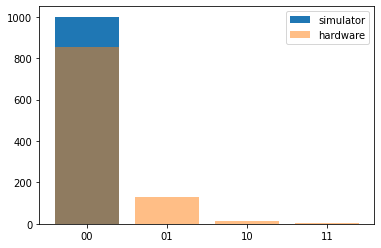

In [14]:
plt.bar(result1.measurement_counts.keys(), result1.measurement_counts.values())
plt.bar(result_hw1.measurement_counts.keys(), result_hw1.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

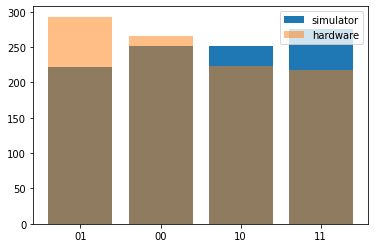

In [15]:
plt.bar(result2.measurement_counts.keys(), result2.measurement_counts.values())
plt.bar(result_hw2.measurement_counts.keys(), result_hw2.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

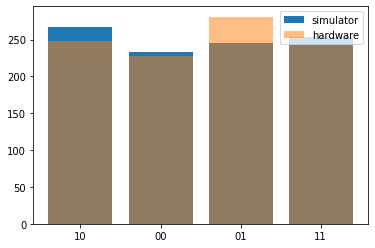

In [16]:
plt.bar(result3.measurement_counts.keys(), result3.measurement_counts.values())
plt.bar(result_hw3.measurement_counts.keys(), result_hw3.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

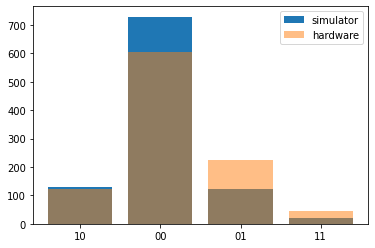

In [17]:
plt.bar(result4.measurement_counts.keys(), result4.measurement_counts.values())
plt.bar(result_hw4.measurement_counts.keys(), result_hw4.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])

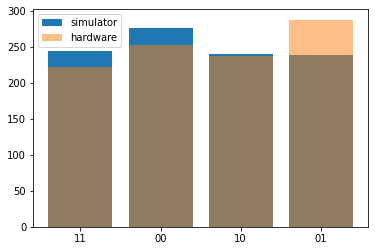

In [18]:
plt.bar(result5.measurement_counts.keys(), result5.measurement_counts.values())
plt.bar(result_hw5.measurement_counts.keys(), result_hw5.measurement_counts.values(), alpha=0.5)
plt.legend(['simulator','hardware'])